# Conhecendo a biblioteca requests



### Primeira Requisição

In [1]:
import requests

In [2]:
r = requests.get('https://api.github.com/events')

In [3]:
r

<Response [200]>

## Explorando a biblioteca

In [4]:
r.status_code

200

In [5]:
r.url

'https://api.github.com/events'

## Utilizando outro endpoint

In [7]:
r = requests.get('https://api.github.com/versions')

In [8]:
r.status_code

200

In [9]:
r.json()

['2022-11-28']

## Extraindo Dados

In [10]:
r = requests.get('https://api.github.com/users/IsackLagares')
r.status_code

200

In [11]:
r.url

'https://api.github.com/users/IsackLagares'

In [12]:
r.json()

{'login': 'IsackLagares',
 'id': 129392360,
 'node_id': 'U_kgDOB7Ze6A',
 'avatar_url': 'https://avatars.githubusercontent.com/u/129392360?v=4',
 'gravatar_id': '',
 'url': 'https://api.github.com/users/IsackLagares',
 'html_url': 'https://github.com/IsackLagares',
 'followers_url': 'https://api.github.com/users/IsackLagares/followers',
 'following_url': 'https://api.github.com/users/IsackLagares/following{/other_user}',
 'gists_url': 'https://api.github.com/users/IsackLagares/gists{/gist_id}',
 'starred_url': 'https://api.github.com/users/IsackLagares/starred{/owner}{/repo}',
 'subscriptions_url': 'https://api.github.com/users/IsackLagares/subscriptions',
 'organizations_url': 'https://api.github.com/users/IsackLagares/orgs',
 'repos_url': 'https://api.github.com/users/IsackLagares/repos',
 'events_url': 'https://api.github.com/users/IsackLagares/events{/privacy}',
 'received_events_url': 'https://api.github.com/users/IsackLagares/received_events',
 'type': 'User',
 'site_admin': False

In [13]:
r.json()['name']

'Isack Rafael Lagares Santos '

In [14]:
r.json()['login']

'IsackLagares'

In [15]:
r.json()['public_repos']

3

In [16]:
r.json()['created_at']

'2023-03-30T11:46:12Z'

## Obtendo dados dos Repositórios

In [17]:
# Espicificando a versao do API
headers = {'X-GitHub-Api-Version': '2022-11-28'}

In [18]:
api_url = 'https://api.github.com'
owner = 'amzn'
url = f'{api_url}/users/{owner}/repos'

## Autenticação 


In [19]:
access_token = ''
headers = {'Authorization': 'Bearer ' + access_token,
           'X-GitHub-Api-Version': '2022-11-28'}

## Paginando os repositórios

In [20]:
api_url = 'https://api.github.com'
owner = 'amzn'
url = f'{api_url}/users/{owner}/repos'

url

'https://api.github.com/users/amzn/repos'

In [21]:
repos_list = []
for page_num in range(1, 6):
    try:
        url_page = f'{url}?page={page_num}'
        response = requests.get(url_page, headers=headers)
        repos_list.append(response.json())
    except:
        repos_list.append(None)

In [22]:
len(repos_list[0])

30

## Transformando os Dados

### Nome dos Repostórios

In [23]:
repos_list[0][0]['name']

'.github'

In [24]:
repos_name = []

for page in repos_list:
    for repo in page:
        repos_name.append(repo['name'])

In [25]:
len(repos_name)

150

## Linguagem dos Repostórios

In [26]:
repos_language = []

for page in repos_list:
    for repo in page:
        repos_language.append(repo['language'])

In [27]:
len(repos_language)

150

## Criando um Data Frame

In [28]:
import pandas as pd

In [29]:
stored_data = pd.DataFrame()
stored_data['repository_name'] = repos_name
stored_data['repository_language'] = repos_language

## Salvando o Data Frame

In [33]:
stored_data.to_csv('../data_frame/repositorys_amazon.csv')

## Trasnformando Dados em Graficos

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set()

### Carregando Dados

In [32]:
df_amzn = pd.read_csv('../data_frame/languages_amzn.csv')
df_netflix = pd.read_csv('../data_frame/languages_netflix.csv')
df_spotify = pd.read_csv('../data_frame/languages_spotify.csv')

### Removendo a coluna 'Unnamed: 0'

In [75]:
df_amzn = df_amzn.drop(columns=['Unnamed: 0'], errors='ignore')
df_netflix = df_netflix.drop(columns=['Unnamed: 0'], errors='ignore')
df_spotify = df_spotify.drop(columns=['Unnamed: 0'], errors='ignore')

### Concatenando os DataFrames

In [76]:
data = pd.concat([df_amzn, df_netflix, df_spotify], ignore_index=True)

In [77]:
data

,repository_names,repository_languages
0,.github,NaN
1,ads-advanced-tools-docs,Jupyter Notebook
2,ads-pao-amznjs-gtm-template,Smarty
3,alexa-coho,JavaScript
4,alexa-skills-kit-js,NaN
...,...,...
653,web-scripts,TypeScript
654,web-scripts-library-template,TypeScript
655,XCMetrics,Swift
656,XCRemoteCache,Swift


### Iterando frequencia por linguagem em um Dicionario

In [81]:
languages = {}

for language in data['repository_languages']:
    if language in languages:
        languages[language] += 1
    else:
        languages[language] = 1

In [82]:
languages

{nan: 46,
 'Jupyter Notebook': 8,
 'Smarty': 2,
 'JavaScript': 64,
 'Python': 138,
 'PHP': 9,
 'Java': 160,
 'CSS': 1,
 'PowerShell': 1,
 'C#': 7,
 'Ruby': 18,
 'Kotlin': 13,
 'C': 16,
 'Swift': 19,
 'C++': 13,
 'Go': 31,
 'TypeScript': 26,
 'Objective-C': 8,
 'HTML': 13,
 'Scala': 24,
 'Mustache': 1,
 'Zeek': 5,
 'Groovy': 5,
 'Shell': 11,
 'Rust': 2,
 'Clojure': 3,
 'HCL': 5,
 'R': 2,
 'Dockerfile': 1,
 'Makefile': 1,
 'D': 1,
 'Dart': 1,
 'Emacs Lisp': 1,
 'Puppet': 1,
 'RAML': 1}

### Criando DataFrame a partir do Dicionario

In [83]:
data = pd.DataFrame()
data['Languages'] = languages.keys()
data['Quantity'] = languages.values()

### Ordenando por Linguagens mais Utilizadas

In [84]:
data.sort_values(by=['Quantity'], ascending=False)

,Languages,Quantity
6,Java,160
4,Python,138
3,JavaScript,64
0,NaN,46
15,Go,31
16,TypeScript,26
19,Scala,24
13,Swift,19
10,Ruby,18
12,C,16


### Removendo valores Null

In [85]:
data = data.dropna(subset=['Languages', 'Quantity'])

### Plotando o Grafico

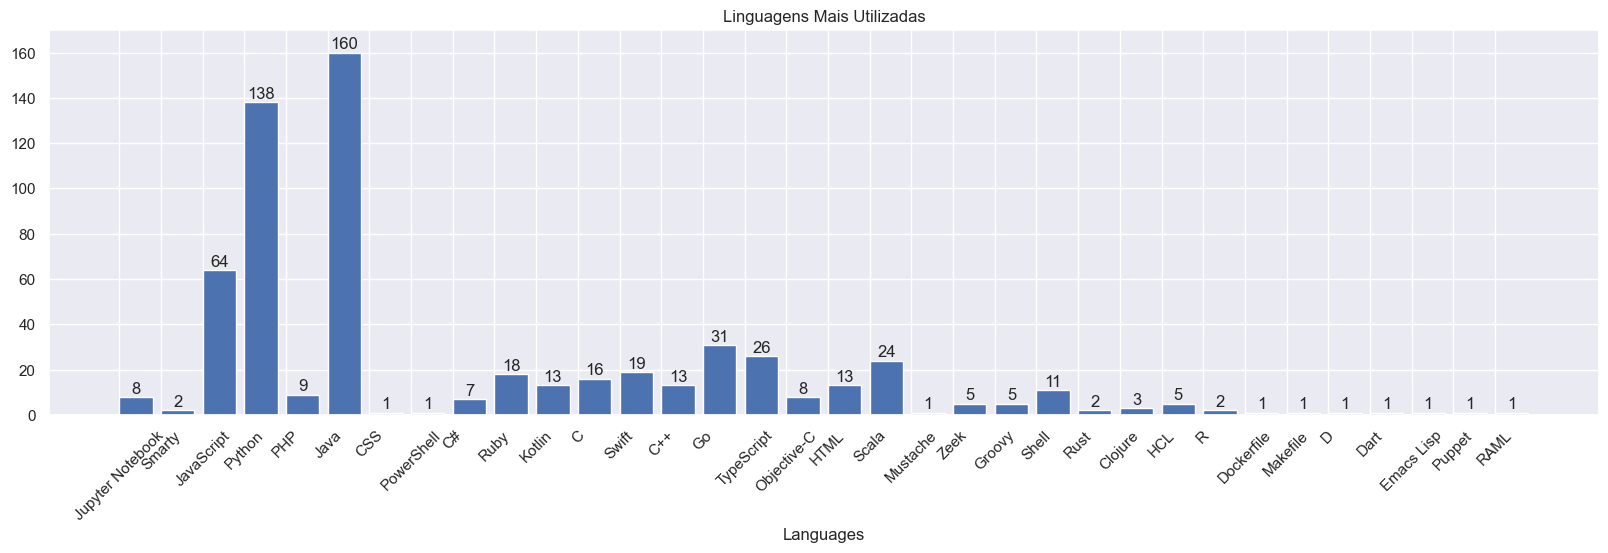

In [88]:
f, ax = plt.subplots(figsize=(20, 5))

graphic = ax.bar(data['Languages'], data['Quantity'], color='b', align='edge')
ax.set_title('Linguagens Mais Utilizadas')
ax.set_xlabel('Languages')
ax.set_ylim(0, max(data['Quantity']) + 10)
ax.bar_label(graphic, padding=0.5)
plt.xticks(rotation=45) 
plt.show()

## Armazenando os Dados

### Criando Repostório com POST para salvar o DataFrame

In [ ]:
api_url = 'https://api.github.com'
url = f'{api_url}/user/repos'

url

'https://api.github.com/user/repos'

In [ ]:
data = {
    'name': 'linguagens-utilizadas-amazon',
    'description': 'Linguagem de Programção utilizadas pela Amazon',
    'private': False,
}

response = requests.post(url, json=data, headers=headers)
response.status_code()

### Formato do Arquivo

+ Conversão de arquivo em base64

In [ ]:
import base64

In [ ]:
with open('repositorys_amazon.csv', 'rb') as file:
    file_content = file.read()

encoded_content = base64.b64encode(file_content)

### Upload de Arquivo com PUT

In [ ]:
api_url = 'https://api.github.com'
username = 'IsackLagares'
repo = 'linguagens-utilizadas'
path = f'repositorys_{owner}.csv'

url = f'{api_url}/repos/{username}/contents/{path}'
url

'https://api.github.com/repos/IsackLagares/contents/repositorys_amazon.csv'

In [ ]:
#data = {
#    'message': 'Adicionando um novo arquivo',
#    'content': encoded_content.decode('utf-8'),
#}

data = {
    'message': f'Linguagens Utilizandas dos Repostórios {owner}',
    'content': '',
}

reponse = requests.put(url, json=data, headers=headers)
response.status_code()